# ANN practical implementation

### Configurações

In [1]:
!pip install tensorflow

###

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential #para forward and back propagation
from tensorflow.keras.layers import Dense #para criar as camadas (input, hidden, output layers)
from tensorflow.keras.layers import LeakyReLU,PReLU, ELU, ReLU #funções de ativação
from tensorflow.keras.layers import Dropout #percentual de neuronios que devem ser desativados em cada camada, para evitar overfitting

### Import and prepare dataset

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide into dependent and independent features

X=dataset.iloc[:,3:-1]
Y=dataset.iloc[:,-1]

In [7]:
# Feature Engineering

geography_ohe = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender_ohe = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

#X = X.merge(geography_ohe,left_index=True,right_index=True)
#X = X.merge(gender_ohe,left_index=True,right_index=True)
#X = X.drop(['Geography','Gender'],axis=1)
#X.head()

X = pd.concat([X, geography_ohe, gender_ohe],axis=1)
X = X.drop(columns=['Geography','Gender'])

In [8]:
#Split dataset into training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=22)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ANN

In [10]:
#Initialize the ANN
classifier=Sequential()

#Add the input layer
classifier.add(Dense(units=11, activation='relu')) #units = número de variáveis | activation é sempre da próxima camada

#Add the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

#Add the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3)) #para essa camada, remove 0.3 dos neurônios

#Add the output layer
classifier.add(Dense(units=1, activation='sigmoid')) #Sigmoid porque a saída é binária


In [11]:
#Define the optimizer e loss function

#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#adam default usa learning_rate = 0.5, mas é possível escolher:

opt=tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#Define a Early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
                                      monitor="val_loss",
                                      min_delta=0.0001,
                                      patience=20,
                                      verbose=1,
                                      mode="auto",
                                      baseline=None,
                                      restore_best_weights=False,
                                      start_from_epoch=0,
                                  ) #Stop training when a monitored metric has stopped improving

In [13]:
model=classifier.fit(X_train,
                    Y_train,
                    validation_split=0.33,
                    batch_size=10,
                    epochs=1000,
                    callbacks=early_stopping)

#Ao longo das iteações é possível ver a acurácia aumentando e a perda diminuindo

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7710 - loss: 0.5301 - val_accuracy: 0.8183 - val_loss: 0.4229
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8158 - loss: 0.4282 - val_accuracy: 0.8209 - val_loss: 0.3940
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8365 - loss: 0.3902 - val_accuracy: 0.8531 - val_loss: 0.3681
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8376 - loss: 0.3887 - val_accuracy: 0.8466 - val_loss: 0.3648
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8562 - loss: 0.3577 - val_accuracy: 0.8614 - val_loss: 0.3541
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3616 - val_accuracy: 0.8561 - val_loss: 0.3523
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.3783 - val_accuracy: 0.8482 - val_loss: 0.3672
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.3690 

In [14]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

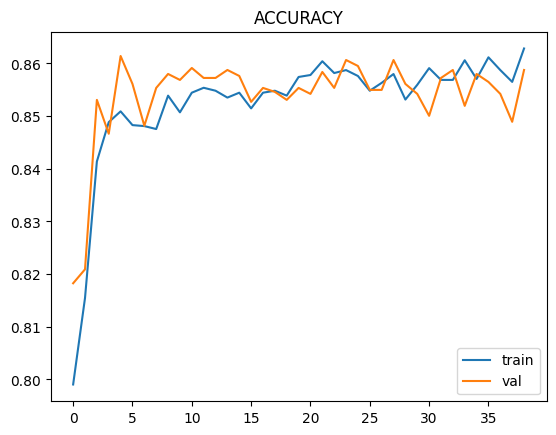

In [15]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.legend(['train','val'])
plt.title('ACCURACY')
plt.show()

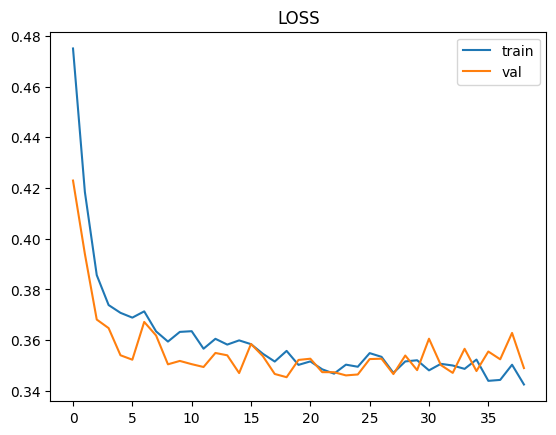

In [16]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.legend(['train','val'])
plt.title('LOSS')
plt.show()

In [17]:
#Weights: pode salvar como pickle para poder usar posteriormente
classifier.get_weights()

[array([[ 0.4553626 ,  1.3969953 , -0.5803605 , -0.37242493, -0.24337889,
         -0.24174076, -0.74328274, -0.6638222 , -0.00941996, -0.2387183 ,
         -0.0518283 ],
        [-2.5342517 ,  1.0174937 , -2.0369782 ,  2.1008637 , -3.1831183 ,
          0.15331262,  1.8078403 , -2.838324  ,  0.10499299,  2.6543038 ,
         -1.7100208 ],
        [ 0.8275914 ,  0.5026532 ,  0.3475416 ,  0.22493775, -0.41442704,
          0.0305123 , -1.2428609 ,  0.12535675,  0.2384673 ,  0.587957  ,
         -0.0439526 ],
        [-1.0166659 , -2.3217494 , -1.1336513 , -0.5217935 , -0.66132396,
         -3.059751  , -0.06760802,  1.9638953 ,  0.98956007, -1.4667816 ,
          0.28838137],
        [-0.63338083,  0.20239575,  1.2374929 , -2.9112737 ,  0.586738  ,
         -3.1125705 ,  0.6559228 , -0.43751097,  3.4995127 , -0.3218383 ,
          1.2528465 ],
        [ 0.44070858, -1.5341744 ,  1.4941789 , -0.18134435, -0.90703547,
         -0.28610706, -0.41653803,  1.4832337 , -0.02726531,  0.1794011

## Evaluation

In [18]:
dataset.groupby('Exited')['CustomerId'].count()/dataset.shape[0]

,CustomerId
Exited,
0,0.7963
1,0.2037


In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5) #1 se for maior que 0,5; 0 c.c.

y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train >= 0.5) #1 se for maior que 0,5; 0 c.c.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
acc_test = accuracy_score(y_pred,Y_test)
acc_test

0.853

In [21]:
acc_train = accuracy_score(y_pred_train,Y_train)
acc_train

0.862875